# STATISTICAL THINKING IN PYTHON II

### You will be able to…
- Estimate parameters
- Compute confidence intervals
- Perform linear regressions
- Test hypotheses

### We use hacker statistics
- Literally simulate probability
- Broadly applicable with a few principles

## Parameter estimation by optimization

When doing statistical inference, we speak the language of probability. A probability distribution that
describes your data has parameters. So, a major goal of statistical inference is to estimate the values of
these parameters, which allows us to concisely and unambiguously describe our data and draw
conclusions from it. In this chapter, you will learn how to find the optimal parameters, those that best
describe your data.

In [1]:
from IPython.display import HTML, Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/01-Optimal_parameters.mp4" type="video/mp4">
</video>

## Optimal parameters

- Parameter values that bring the model in closest agreement with the data

### Packages to do statistical inference

![][00_Packages_to_do_statistical_inference]

[00_Packages_to_do_statistical_inference]: _Docs/00_Packages_to_do_statistical_inference.png

### How often do we get no-hitters?
**The number of games played** between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array `nohitter_times`.

In [3]:
nohitter_times = np.array([843,1613,1101,215,684,814,278,324,161,219,545,715,966,624,29,450,107,20,91,1325,124,1468,104,1309,429,62,1878,1104,123,251,93,188,983,166,96,702,23,524,26,299,59,39,12,2,308,1114,813,887,645,2088,42,2090,11,886,1665,1084,2900,2432,750,4021,1070,1765,1322,26,548,1525,77,2181,2752,127,2147,211,41,1575,151,479,697,557,2267,542,392,73,603,233,255,528,397,1529,1023,1194,462,583,37,943,996,480,1497,717,224,219,1531,498,44,288,267,600,52,269,1086,386,176,2199,216,54,675,1243,463,650,171,327,110,774,509,8,197,136,12,1124,64,380,811,232,192,731,715,226,605,539,1491,323,240,179,702,156,82,1397,354,778,603,1001,385,986,203,149,576,445,180,1403,252,675,1351,2983,1568,45,899,3260,1025,31,100,2055,4043,79,238,3931,2351,595,110,215,0,563,206,660,242,577,179,157,192,192,1848,792,1693,55,388,225,1134,1172,1555,31,1582,1044,378,1687,2915,280,765,2819,511,1521,745,2491,580,2072,6450,578,745,1075,1103,1549,1520,138,1202,296,277,351,391,950,459,62,1056,1128,139,420,87,71,814,603,1349,162,1027,783,326,101,876,381,905,156,419,239,119,129,467])

**If you assume that no-hitters are described as a Poisson process**, then **the time between no-hitters is Exponentially distributed**. As you have seen, the Exponential distribution has a single parameter, which we will call **τ**, the typical interval time. The value of the parameter **τ** that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use `np.random.exponential()` to "repeat" the history of Major League Baseball by drawing **inter-no-hitter** times from an exponential distribution with the **τ** you found and plot the histogram as an approximation to the PDF.

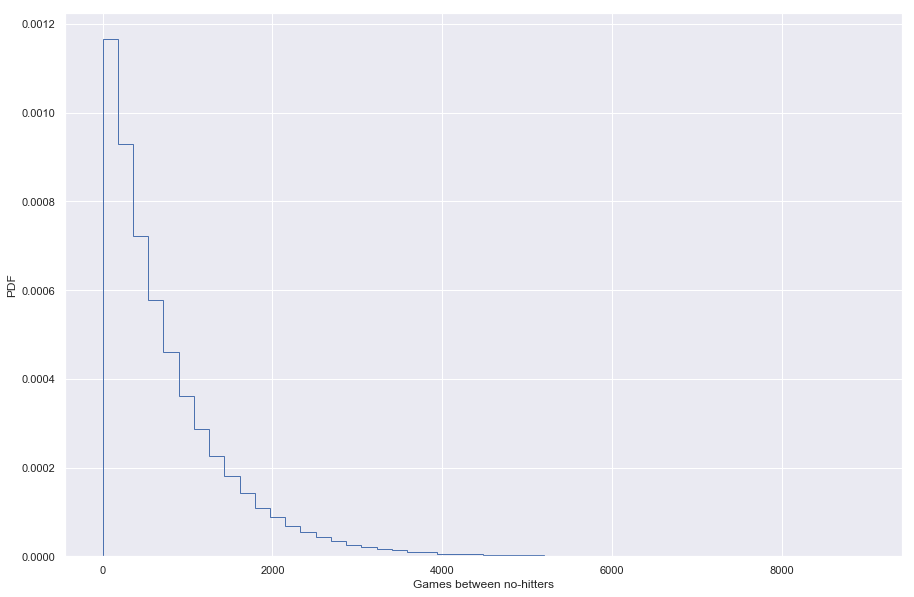

In [4]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw 100,000 samples from an Exponential distribution with the parameter you computed from the mean of the inter-no-hitter times.
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
plt.figure(figsize=(15,10))
_ = plt.hist(inter_nohitter_time, bins=50, density=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.

### Do the data follow our story?
You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

It may be helpful to remind yourself of the **function you created in the previous course to compute the ECDF**, as well as the **code you wrote to plot it**.

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

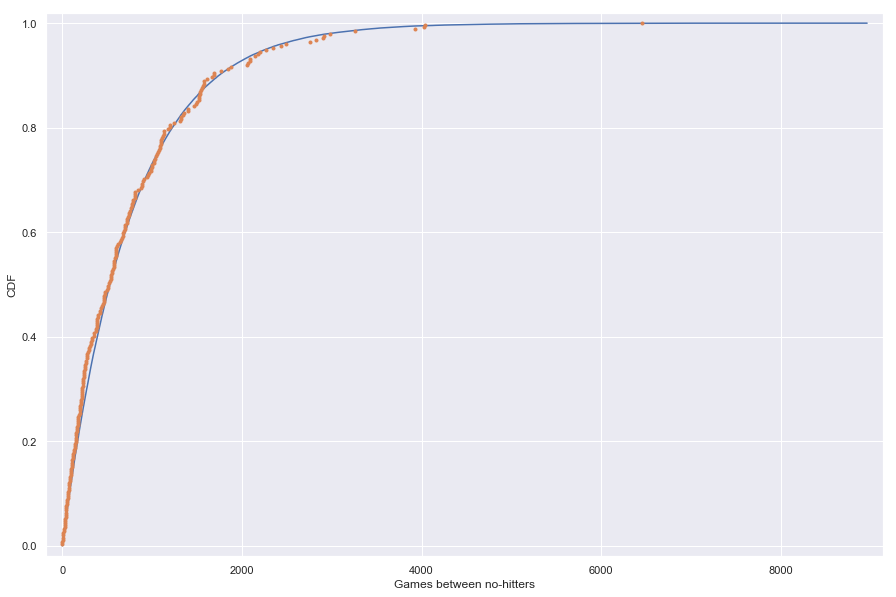

In [6]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.figure(figsize=(15,10))
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

### How is this parameter optimal?
Now sample out of an exponential distribution with τ being twice as large as the optimal τ. Do it again for τ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the τ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

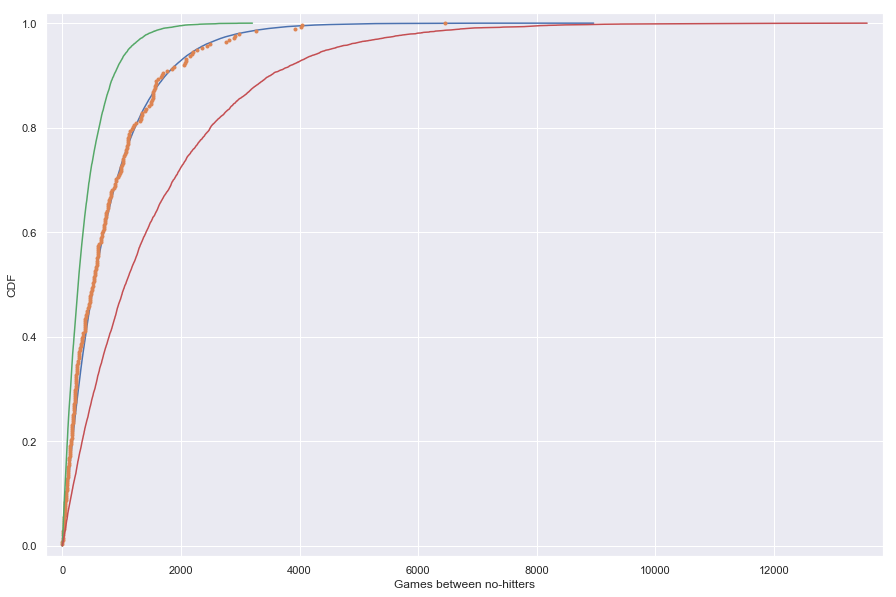

In [7]:
plt.figure(figsize=(15,10))

# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2,10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau,10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

Notice how the value of tau given by the mean matches the data best. In this way, **tau is an optimal parameter.**

## [Linear regression by least squares][1]
- **Least squares**: The process of finding the parameters for which the sum of the squares of the residuals is minimal

![][LR]
![][LRgif]


[1]: https://towardsdatascience.com/linear-regression-using-least-squares-a4c3456e8570
[LR]: _Docs/LR.png
[LRgif]: _Docs/LRgif.gif

In [8]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/02-Linear_regression_by_least_squares.mp4" type="video/mp4">
</video>

### EDA of literacy/fertility data
In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the [illiteracy rate][1].

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array `illiteracy` has the illiteracy rate among females for most of the world's nations. The array `fertility` has the corresponding fertility data.

Here, it may be useful to refer back to the function you wrote in the previous course to compute the Pearson correlation coefficient.

[1]: http://uis.unesco.org/en/glossary-term/literacy-rate

In [9]:
illiteracy = np.array([9.5,49.2,1.,11.2,9.8,60.,50.2,51.2,0.6,1.,8.5,6.1,9.8,1.,42.2,77.2,18.7,22.8,8.5,43.9,1.,1.,1.5,10.8,11.9,3.4,0.4,3.1,6.6,33.7,40.4,2.3,17.2,0.7,36.1,1.,33.2,55.9,30.8,87.4,15.4,54.6,5.1,1.1,10.2,19.8,0.,40.7,57.2,59.9,3.1,55.7,22.8,10.9,34.7,32.2,43.,1.3,1.,0.5,78.4,34.2,84.9,29.1,31.3,18.3,81.8,39.,11.2,67.,4.1,0.2,78.1,1.,7.1,1.,29.,1.1,11.7,73.6,33.9,14.,0.3,1.,0.8,71.9,40.1,1.,2.1,3.8,16.5,4.1,0.5,44.4,46.3,18.7,6.5,36.8,18.6,11.1,22.1,71.1,1.,0.,0.9,0.7,45.5,8.4,0.,3.8,8.5,2.,1.,58.9,0.3,1.,14.,47.,4.1,2.2,7.2,0.3,1.5,50.5,1.3,0.6,19.1,6.9,9.2,2.2,0.2,12.3,4.9,4.6,0.3,16.5,65.7,63.5,16.8,0.2,1.8,9.6,15.2,14.4,3.3,10.6,61.3,10.9,32.2,9.3,11.6,20.7,6.5,6.7,3.5,1.,1.6,20.5,1.5,16.7,2.,0.9])
fertility = np.array([1.769,2.682,2.077,2.132,1.827,3.872,2.288,5.173,1.393,1.262,2.156,3.026,2.033,1.324,2.816,5.211,2.1,1.781,1.822,5.908,1.881,1.852,1.39,2.281,2.505,1.224,1.361,1.468,2.404,5.52,4.058,2.223,4.859,1.267,2.342,1.579,6.254,2.334,3.961,6.505,2.53,2.823,2.498,2.248,2.508,3.04,1.854,4.22,5.1,4.967,1.325,4.514,3.173,2.308,4.62,4.541,5.637,1.926,1.747,2.294,5.841,5.455,7.069,2.859,4.018,2.513,5.405,5.737,3.363,4.89,1.385,1.505,6.081,1.784,1.378,1.45,1.841,1.37,2.612,5.329,5.33,3.371,1.281,1.871,2.153,5.378,4.45,1.46,1.436,1.612,3.19,2.752,3.35,4.01,4.166,2.642,2.977,3.415,2.295,3.019,2.683,5.165,1.849,1.836,2.518,2.43,4.528,1.263,1.885,1.943,1.899,1.442,1.953,4.697,1.582,2.025,1.841,5.011,1.212,1.502,2.516,1.367,2.089,4.388,1.854,1.748,2.978,2.152,2.362,1.988,1.426,3.29,3.264,1.436,1.393,2.822,4.969,5.659,3.24,1.693,1.647,2.36,1.792,3.45,1.516,2.233,2.563,5.283,3.885,0.966,2.373,2.663,1.251,2.052,3.371,2.093,2.,3.883,3.852,3.718,1.732,3.928])

In [10]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

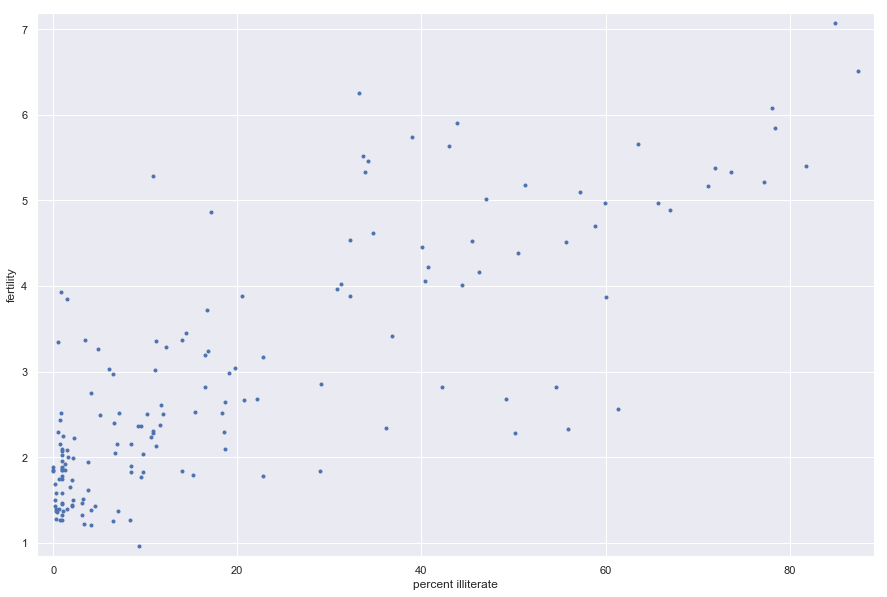

0.8041324026815341


In [11]:
plt.figure(figsize=(15,10))

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

You can see the correlation between illiteracy and fertility by eye, and by the substantial Pearson correlation coefficient of 0.8. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman.

### Linear regression
We will assume that fertility is a linear function of the female illiteracy rate. That is, **f=ai+b**, where **a** is the slope and **b** is the intercept. **We can think of the intercept as the minimal fertility rate**, probably somewhere between one and two. **The slope tells us how the fertility rate varies with illiteracy**. We can find the best fit line using `np.polyfit()`.

Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


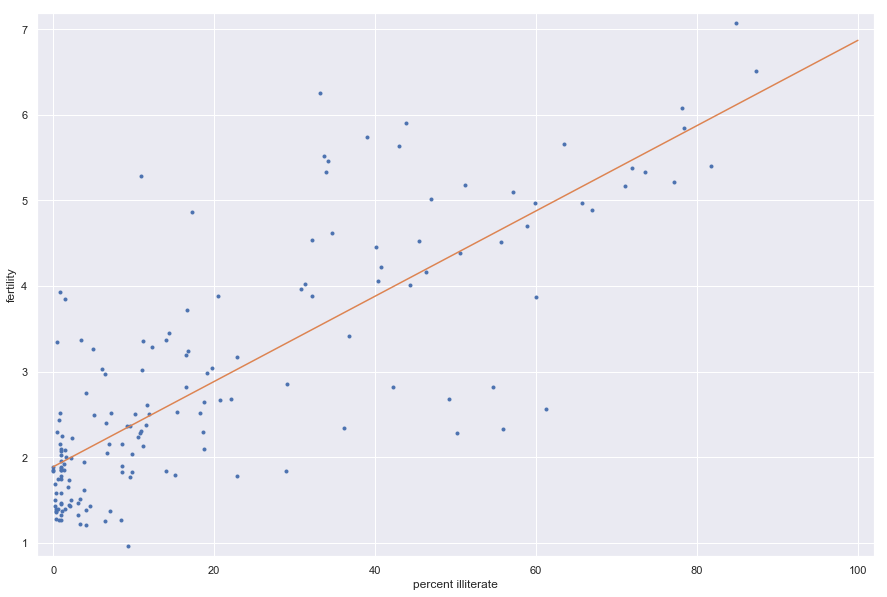

In [12]:
plt.figure(figsize=(15,10))

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy,fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

### How is it optimal?
The function `np.polyfit()` that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter `a`. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

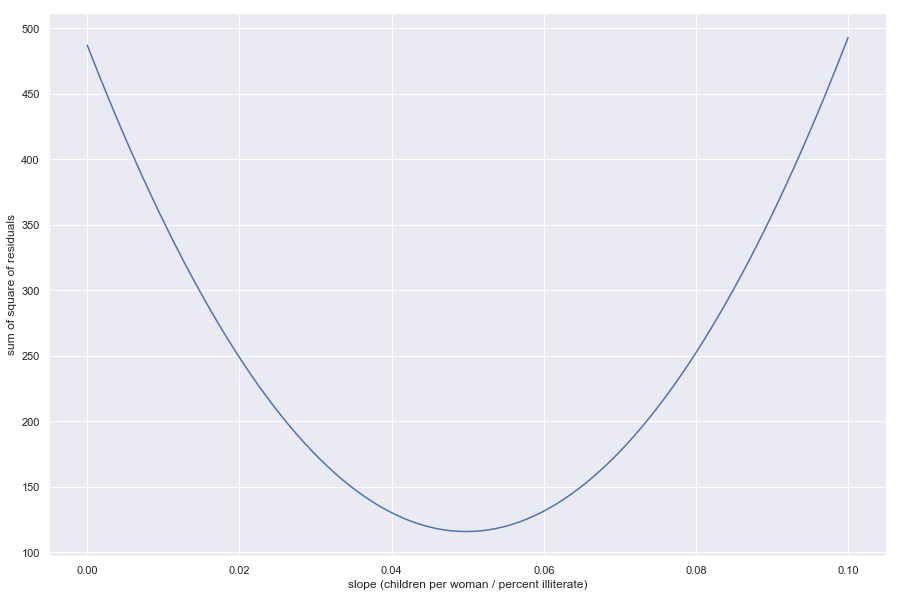

In [13]:
plt.figure(figsize=(15,10))

# Specify slopes to consider.  to get 100 points in the range between 0 and 0.5, you could use np.linspace(0, 0.5, 100)
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss. The empty_like() function returns a new array with the same shape and type as a given array
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals. Hint: the RSS is given by np.sum((y_data - a * x_data - b)**2)
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression (slope = 0.04979854809063423).

## The importance of EDA: Anscombe's quartet

![][anscombe]

### Look before you leap!
- Do graphical EDA first

[anscombe]: _Docs/anscombe.gif


In [14]:
%%HTML
<video style="display:block; margin: 0 auto;" controls>
      <source src="_Docs/03-The_importance_of_EDA_Anscombe's_quartet.mp4" type="video/mp4">
</video>

### The importance of EDA
Why should exploratory data analysis be the first step in an analysis of data (after getting your data imported and cleaned, of course)?

**Possible Answers**
- [ ] You can be protected from misinterpretation of the type demonstrated by Anscombe's quartet.
- [ ] EDA provides a good starting point for planning the rest of your analysis.
- [ ] EDA is not really any more difficult than any of the subsequent analysis, so there is no excuse for not exploring the data.
- [x] All of these reasons!

### Linear regression on appropriate Anscombe data
For practice, perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

In [15]:
anscombe = pd.read_csv('../_datasets/anscombe.csv')

columns = ['x1','y1','x2','y2','x3','y3','x4','y4']
anscombe = anscombe[1:].astype('float')
anscombe.columns = columns

anscombe

,x1,y1,x2,y2,x3,y3,x4,y4
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
10,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [16]:
x = anscombe['x1'].values
y = anscombe['y1'].values

0.5000909090909095 3.0000909090909076


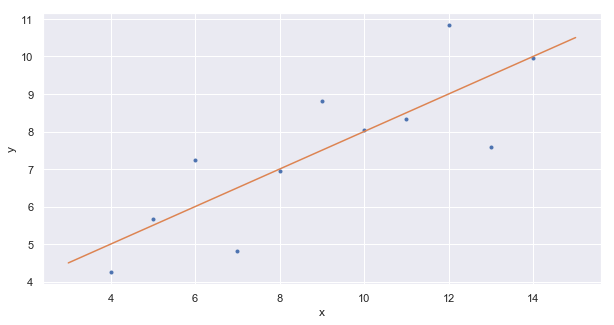

In [17]:
plt.figure(figsize=(10,5))
# Perform linear regression: a, b
a, b = np.polyfit(x,y,1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x,y,marker='.',linestyle="none")
_ = plt.plot(x_theor,y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

### Linear regression on all Anscombe data
Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, you will compute the slope and intercept for each set. The data are stored in lists; `anscombe_x = [x1, x2, x3, x4]` and `anscombe_y = [y1, y2, y3, y4]`, where, for example, `x2` and `y2` are the x and y values for the second Anscombe data set.

In [18]:
anscombe_x = [anscombe['x1'].values,anscombe['x2'].values,anscombe['x3'].values,anscombe['x4'].values]
anscombe_y = [anscombe['y1'].values,anscombe['y2'].values,anscombe['y3'].values,anscombe['y4'].values]

In [19]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y,1)

    # Print the result
    print('slope:', a, 'intercept:', b)


slope: 0.5000909090909095 intercept: 3.0000909090909076
slope: 0.5000000000000004 intercept: 3.000909090909089
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.49990909090909064 intercept: 3.0017272727272735


Indeed, they all have the same slope and intercept.